> # **Tackling Overfitting With Data Augmentation**


## 1) Installing Libraries


In [1]:
!pip install tf-keras==2.15 --quiet
!pip install tensorflow==2.15 --quiet
!pip install keras==2.15 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00


## 2) Importing Libraries


In [2]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

## 3) Downloading and Unzipping the Data


In [3]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2024-08-20 05:58:28--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.44.78.15, 2600:1407:7400:1184::317f, 2600:1407:7400:1187::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.44.78.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M   108MB/s    in 11s     

2024-08-20 05:58:39 (71.7 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



## 4) Logging Info About Files Downloaded


In [4]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')

# Deletes all non-image files (there are two .db files bundled into the dataset)
!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


## 5) Creating New Directories to Split Training and Validation Data


In [5]:
# Define root directory
root_dir = "/tmp/cats-v-dogs"

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)


# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
    os.makedirs(os.path.join(root_path, "training"))
    os.makedirs(os.path.join(root_path, "validation"))
    os.makedirs(os.path.join(root_path, "training/cats"))
    os.makedirs(os.path.join(root_path, "training/dogs"))
    os.makedirs(os.path.join(root_path, "validation/cats"))
    os.makedirs(os.path.join(root_path, "validation/dogs"))


try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print(
        "You should not be seeing this since the upper directory is removed beforehand"
    )

In [6]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/validation
/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/validation/dogs
/tmp/cats-v-dogs/validation/cats
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/training/cats


## 6) Splitting Files and Ignoring One with 0 Size


In [7]:
import math


# GRADED FUNCTION: split_data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    file_labels = os.listdir(SOURCE_DIR)
    random_file_labels = random.sample(file_labels, len(file_labels))
    training_file_labels = random_file_labels[
        : math.floor(len(random_file_labels) * SPLIT_SIZE)
    ]
    validation_file_labels = random_file_labels[
        math.floor(len(random_file_labels) * SPLIT_SIZE) :
    ]

    for rootdir, dirs, files in os.walk(SOURCE_DIR):
        for file in files:
            if os.path.getsize(os.path.join(SOURCE_DIR, file)) == 0:
                print(f"filename {file} is zero length, so ignoring.")
            elif file in training_file_labels:
                copyfile(
                    os.path.join(SOURCE_DIR, file), os.path.join(TRAINING_DIR, file)
                )
            elif file in validation_file_labels:
                copyfile(
                    os.path.join(SOURCE_DIR, file), os.path.join(VALIDATION_DIR, file)
                )

In [8]:
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
VALIDATION_DIR = "/tmp/cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
    for file in os.scandir(TRAINING_CATS_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
    for file in os.scandir(TRAINING_DOGS_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
    for file in os.scandir(VALIDATION_CATS_DIR):
        os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
    for file in os.scandir(VALIDATION_DOGS_DIR):
        os.remove(file.path)

# Define proportion of images used for training
split_size = 0.9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits. Check that the number of images matches the expected output.
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

filename 666.jpg is zero length, so ignoring.
filename 11702.jpg is zero length, so ignoring.


Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


## 7) Creating ImageDataGenerator for Training and Validation


In [9]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(
        rescale=1 / 255,
        rotation_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest",
    )

    train_generator = train_datagen.flow_from_directory(
        directory=TRAINING_DIR,
        batch_size=10,
        class_mode="categorical",
        target_size=(150, 150),
    )

    validation_datagen = ImageDataGenerator(rescale=1 / 255)

    validation_generator = validation_datagen.flow_from_directory(
        directory=VALIDATION_DIR,
        batch_size=10,
        class_mode="categorical",
        target_size=(150, 150),
    )

    return train_generator, validation_generator

In [10]:
train_generator, validation_generator = train_val_generators(
    TRAINING_DIR, VALIDATION_DIR
)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


## 8) Defining and Compiling the Model


In [11]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Dense,
    BatchNormalization,
    GlobalAveragePooling2D,
    Dropout,
)


def create_model():
    model = tf.keras.models.Sequential(
        [
            Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
            BatchNormalization(),
            MaxPooling2D(2, 2),
            Conv2D(64, (3, 3), activation="relu"),
            BatchNormalization(),
            MaxPooling2D(2, 2),
            Conv2D(128, (3, 3), activation="relu"),
            BatchNormalization(),
            MaxPooling2D(2, 2),
            Conv2D(256, (3, 3), activation="relu"),
            BatchNormalization(),
            MaxPooling2D(2, 2),
            Conv2D(512, (3, 3), activation="relu"),
            BatchNormalization(),
            MaxPooling2D(2, 2),
            GlobalAveragePooling2D(),
            Dense(512, activation="relu"),
            BatchNormalization(),
            Dropout(0.5),
            Dense(2, activation="softmax"),
        ]
    )

    model.compile(
        optimizer=RMSprop(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )

    return model

## 9) Defining Callback and Training the Model


In [12]:
model = create_model()


class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (
            logs.get("val_accuracy") is not None
            and logs.get("val_accuracy") > 0.8
            and logs.get("accuracy") is not None
            and logs.get("accuracy") > 0.8
        ):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True


callbacks = MyCallback()

history = model.fit(
    train_generator,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[callbacks],
)

Epoch 1/15
 869/2250 [==========>...................] - ETA: 16:26 - loss: 0.8284 - accuracy: 0.5531

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


2250/2250 [==============================] - 1647s 731ms/step - loss: 0.7329 - accuracy: 0.5959 - val_loss: 0.5860 - val_accuracy: 0.6908
Epoch 2/15
2250/2250 [==============================] - 1619s 719ms/step - loss: 0.5823 - accuracy: 0.7033 - val_loss: 0.8483 - val_accuracy: 0.6232
Epoch 3/15
2250/2250 [==============================] - 1627s 723ms/step - loss: 0.4950 - accuracy: 0.7639 - val_loss: 0.5385 - val_accuracy: 0.7368
Epoch 4/15
2250/2250 [==============================] - ETA: 0s - loss: 0.4336 - accuracy: 0.8025
Reached 99% accuracy so cancelling training!
2250/2250 [==============================] - 1618s 719ms/step - loss: 0.4336 - accuracy: 0.8025 - val_loss: 0.3346 - val_accuracy: 0.8572


## 10) Generating Charts


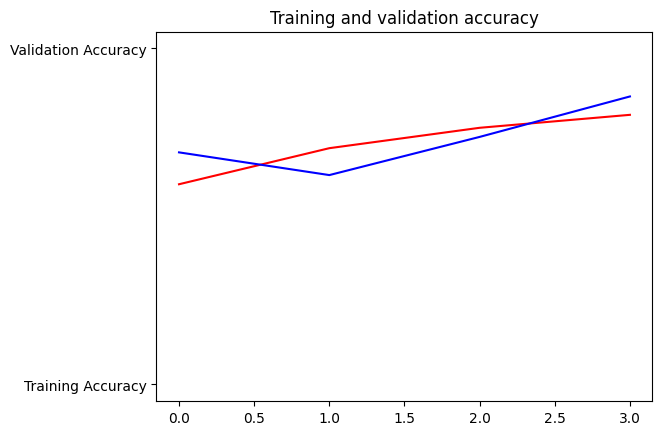

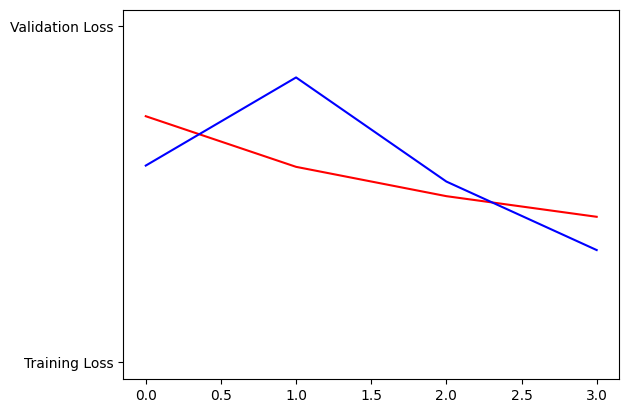

In [18]:
# -----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
# -----------------------------------------------------------
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))  # Get number of epochs

# ------------------------------------------------
# Plot training and validation accuracy per epoch
# ------------------------------------------------
plt.plot(epochs, acc, "r", "Training Accuracy")
plt.plot(epochs, val_acc, "b", "Validation Accuracy")
plt.title("Training and validation accuracy")
plt.show()
print("")

# ------------------------------------------------
# Plot training and validation loss per epoch
# ------------------------------------------------
plt.plot(epochs, loss, "r", "Training Loss")
plt.plot(epochs, val_loss, "b", "Validation Loss")
plt.show()